<a href="https://colab.research.google.com/github/KiptooAlvin/Alvin-project/blob/master/Iris_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**
#  Iris Clustering Assignment

This notebook applies **K-Means** and **Hierarchical Clustering** on the Iris dataset to explore unsupervised learning and how clustering can uncover hidden patterns.

---
## **Task 1: Load the Dataset**
We'll start by loading the Iris dataset from scikit-learn and displaying the first five rows to understand its structure.


In [1]:

from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display first 5 rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2



---
## **Task 2: Explore the Data**
We'll check the number of rows and columns, and view all feature names to understand what data we are working with.


In [2]:

print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())


Shape of dataset: (150, 4)
Column names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']



---
## **Task 3: Apply K-Means Clustering**
We'll use **K-Means** from scikit-learn with `k = 3` (since there are three Iris species).  
We’ll visualize clusters using a scatter plot of **Sepal Length vs. Sepal Width**.


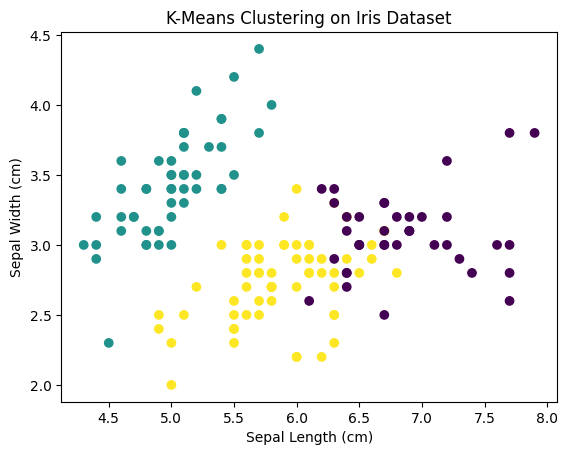

Cluster labels: [1 0 2]


In [3]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Plot clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-Means Clustering on Iris Dataset")
plt.show()

print("Cluster labels:", df['KMeans_Cluster'].unique())



---
## **Task 4: Apply Hierarchical Clustering**
We’ll use **Agglomerative Clustering** with 3 clusters and visualize the dendrogram to observe how clusters merge step-by-step.


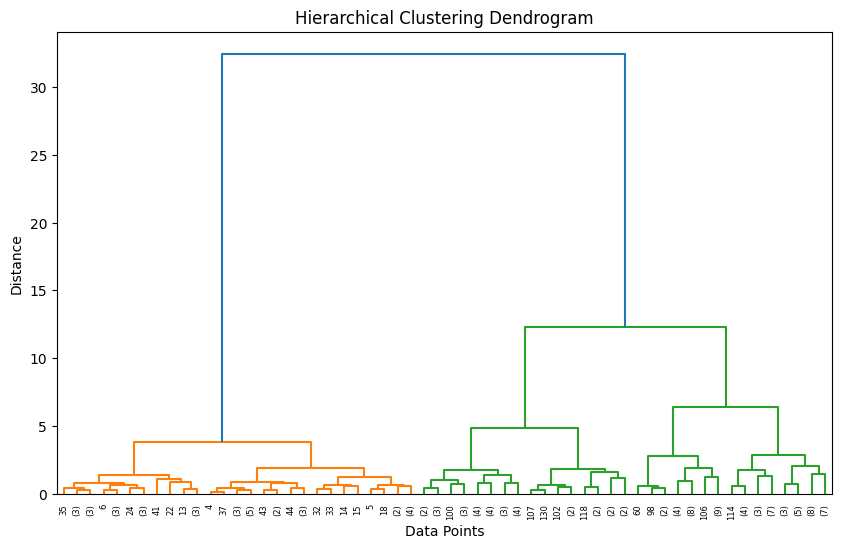

In [4]:

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = agg.fit_predict(df.iloc[:, 0:4])

# Plot dendrogram
linked = linkage(df.iloc[:, 0:4], method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



---
## **Task 5: Evaluate Clusters**
We'll use the **Silhouette Score** to measure how well each data point fits within its cluster.
A higher score means better-defined clusters.


In [5]:

from sklearn.metrics import silhouette_score

# Evaluate K-Means
kmeans_score = silhouette_score(df.iloc[:, 0:4], df['KMeans_Cluster'])
print("Silhouette Score for K-Means:", kmeans_score)

# Evaluate Hierarchical
hierarchical_score = silhouette_score(df.iloc[:, 0:4], df['Hierarchical_Cluster'])
print("Silhouette Score for Hierarchical Clustering:", hierarchical_score)


Silhouette Score for K-Means: 0.551191604619592
Silhouette Score for Hierarchical Clustering: 0.5543236611296419



---
## **Task 6: Reflection**
**Observations:**
- The clusters formed distinct groups based on petal and sepal measurements.
- K-Means clustered most data points accurately according to the actual Iris species, though some overlap exists.
- Hierarchical clustering showed similar grouping but was slightly less defined.

**Conclusion:**
K-Means provided better separation (as indicated by a higher silhouette score) and is more efficient for larger datasets, making it more useful in this case.



---
#  Additional Visualizations for Deeper Insights

To better understand the clustering results, we’ll add several advanced visualizations.



## **1. Pair Plot of All Features**
We’ll use a pair plot to visualize all feature combinations and how clusters form across them.


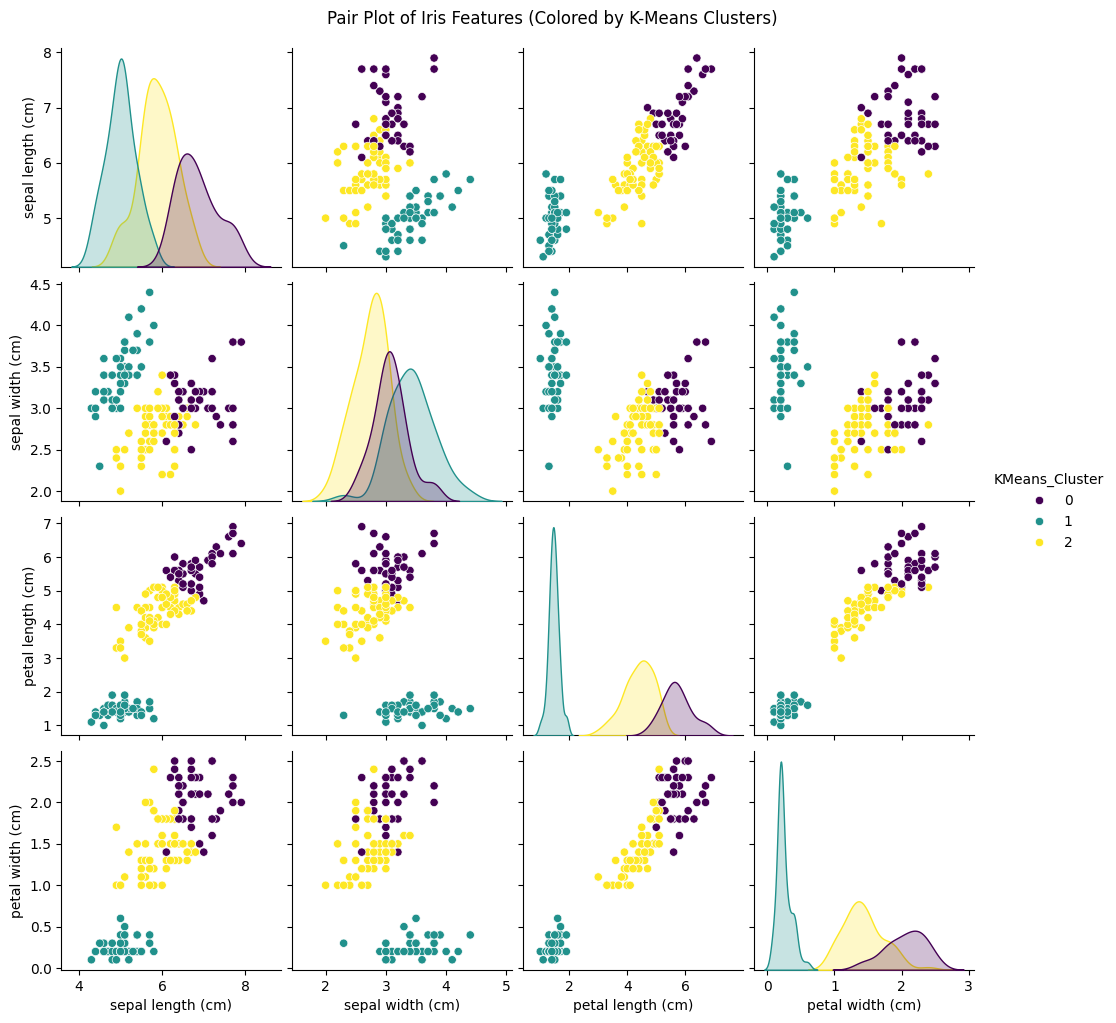

In [6]:

import seaborn as sns

sns.pairplot(df, vars=iris.feature_names, hue='KMeans_Cluster', palette='viridis')
plt.suptitle("Pair Plot of Iris Features (Colored by K-Means Clusters)", y=1.02)
plt.show()



## **2. Cluster Centroids Visualization**
Visualize K-Means cluster centroids on the scatter plot of Sepal Length vs. Sepal Width.


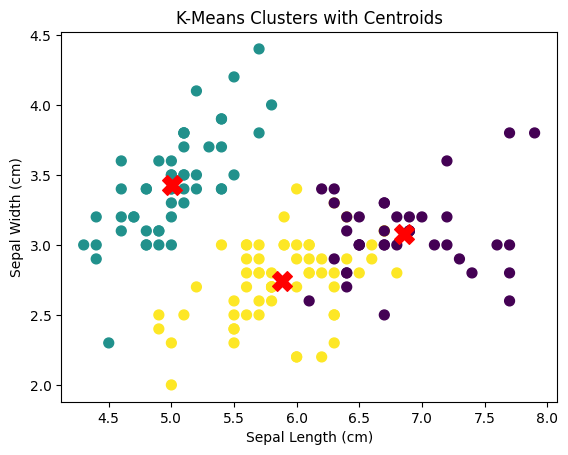

In [7]:

centroids = kmeans.cluster_centers_
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-Means Clusters with Centroids")
plt.show()



## **3. 3D Visualization of Clusters**
Let's visualize the clustering in 3D using three of the Iris features.


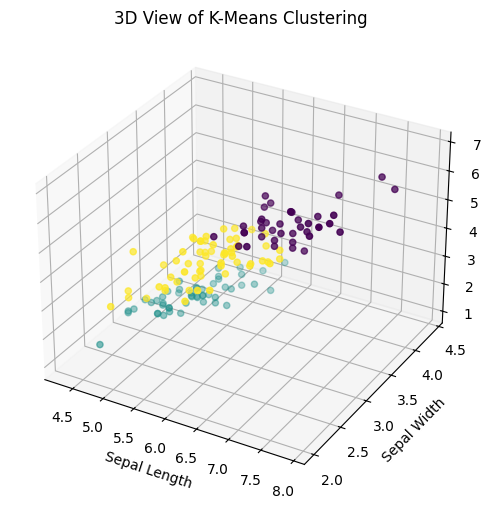

In [8]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['KMeans_Cluster'], cmap='viridis')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title("3D View of K-Means Clustering")
plt.show()



## **4. Elbow Method for Optimal k**
We'll use the elbow method to find the ideal number of clusters.


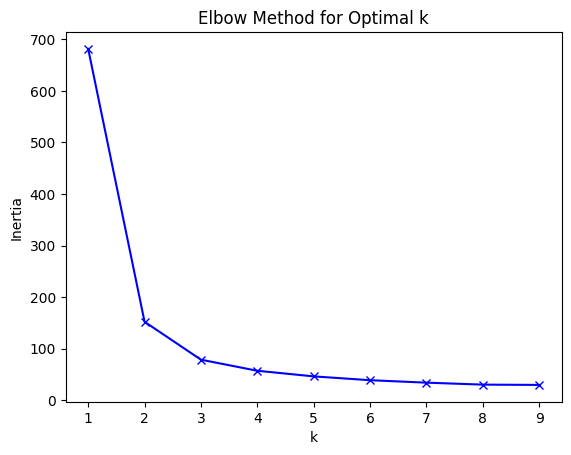

In [9]:

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df.iloc[:, 0:4])
    inertia.append(model.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



## **5. Colored Dendrogram**
We’ll make the hierarchical dendrogram easier to interpret using color-coded clusters.


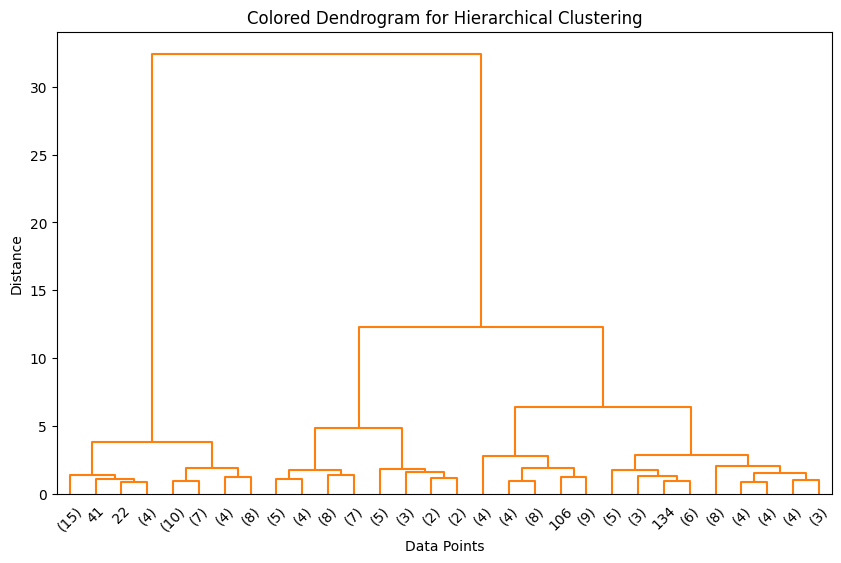

In [10]:

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30, color_threshold=50)
plt.title("Colored Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()



## **6. Cluster Feature Means**
We'll visualize the mean of each feature within each cluster to interpret cluster characteristics.


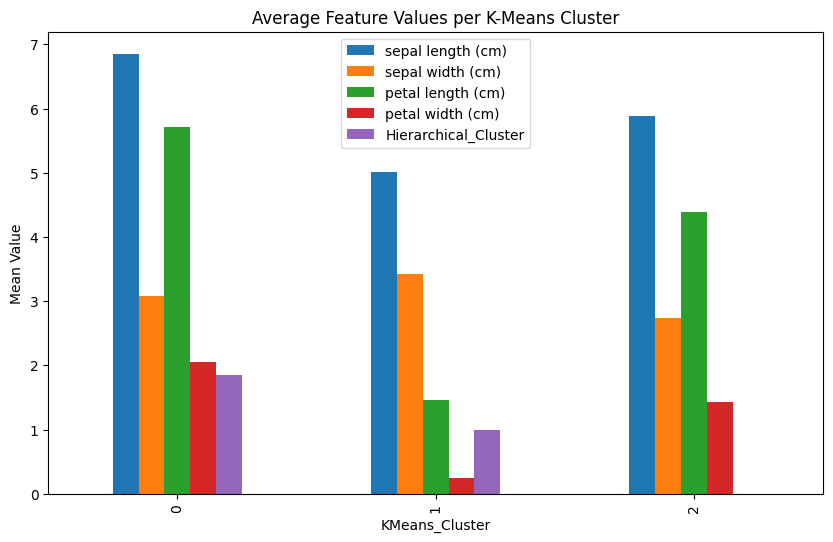

In [11]:

cluster_means = df.groupby('KMeans_Cluster').mean()
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title("Average Feature Values per K-Means Cluster")
plt.ylabel("Mean Value")
plt.show()
